In [ ]:
import zipfile

In [ ]:
!gdown 19E90ABeePJew3jX1QR1H8USHmzxbeSmO

Downloading...
From (original): https://drive.google.com/uc?id=1nCclKws9dCmGPFtLoc30vg9rpFP7PQz6
From (redirected): https://drive.google.com/uc?id=1nCclKws9dCmGPFtLoc30vg9rpFP7PQz6&confirm=t&uuid=2260a253-8636-4652-bdfc-0906b0aadbf6
To: /content/capst_dataset.zip
100% 157M/157M [00:12<00:00, 12.2MB/s]


In [ ]:
with zipfile.ZipFile("capst_dataset2.zip","r") as zip_ref:
    zip_ref.extractall()

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.30 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/107.7 GB disk)


In [ ]:
!yolo task=detect mode=train model=yolov8l.pt data=data.yaml epochs=60 imgsz=256 batch=16 workers=8 augment=True device=cuda conf=0.3

Ultralytics YOLOv8.2.29 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.3, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

In [ ]:
from google.colab import files
files.download("runs/detect/train/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%capture
!pip install opencv-python-headless matplotlib

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt data=data.yaml source=test222.jpg

Ultralytics YOLOv8.2.29 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43612005 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/test222.jpg: 256x256 23 red_id_onions, 7 tomatos, 18.8ms
Speed: 1.4ms preprocess, 18.8ms inference, 579.2ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


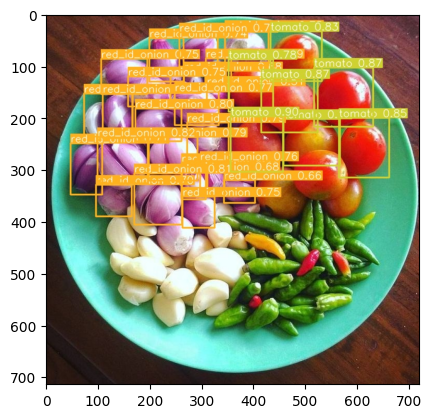

In [ ]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('runs/detect/predict/test222.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

In [ ]:
!yolo export model=runs/detect/train/weights/best.pt format=tflite

Ultralytics YOLOv8.2.30 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 268 layers, 43612005 parameters, 0 gradients, 164.8 GFLOPs

PyTorch: starting from 'best.pt' with input shape (1, 3, 256, 256) BCHW and output shape(s) (1, 11, 1344) (83.6 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'sng4onnx>=1.0.1', 'onnxslim==0.1.28', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 191.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 139.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 114.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 181.2 MB/s eta 0:00:00
     ━━━━━━

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading best_saved_model/best_float32.tflite for TensorFlow Lite inference...

0: 256x256 6 white_id_onions, 1054.6ms
Speed: 3.2ms preprocess, 1054.6ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/detect/predict3


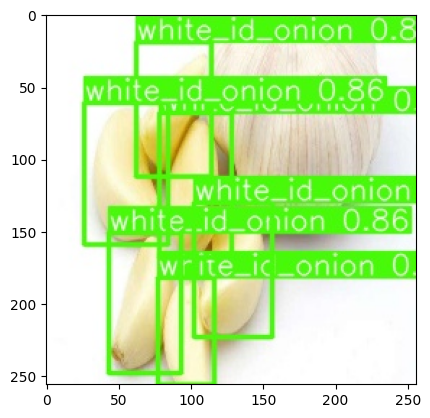

In [ ]:
# @title Testing tflite
from ultralytics import YOLO

# Load a model
model = YOLO("best_saved_model/best_float32.tflite")

# Run batched inference on a list of images
image_path = 'test555.jpg'
image = cv2.imread(image_path)

# Define the required size for the YOLO model
required_size = (256, 256)

# Resize the image to the required size
resized_image = cv2.resize(image, required_size)

model.predict(resized_image, save=True, imgsz=256, conf=0.5)

img = cv2.imread('runs/detect/predict3/image0.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

In [ ]:
# !zip -r /content/file.zip runs/detect/train3/weights/best_saved_model

  adding: runs/detect/train3/weights/best_saved_model/ (stored 0%)
  adding: runs/detect/train3/weights/best_saved_model/best_float32.tflite (deflated 18%)
  adding: runs/detect/train3/weights/best_saved_model/metadata.yaml (deflated 36%)
  adding: runs/detect/train3/weights/best_saved_model/best_float16.tflite (deflated 8%)
  adding: runs/detect/train3/weights/best_saved_model/saved_model.pb (deflated 7%)
  adding: runs/detect/train3/weights/best_saved_model/assets/ (stored 0%)
  adding: runs/detect/train3/weights/best_saved_model/variables/ (stored 0%)
  adding: runs/detect/train3/weights/best_saved_model/variables/variables.data-00000-of-00001 (deflated 80%)
  adding: runs/detect/train3/weights/best_saved_model/variables/variables.index (deflated 33%)
  adding: runs/detect/train3/weights/best_saved_model/fingerprint.pb (stored 0%)


In [ ]:
from google.colab import files
files.download("best_saved_model/best_float32.tflite")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>